In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


ModuleNotFoundError: No module named 'pandas'

In [6]:
import warnings
warnings.simplefilter('ignore')

# Overview of my data set
I've chosen data set about popular songs on Spotify during the period between 1998 and 2020
My project will cover dates from 1999 to 2019.

This is explaining of not trivial names of columns and their values:
danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Energy: energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

Loudness: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

Mode: mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

Speechiness: speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Acousticness: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Instrumentalness: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Liveness: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

Valence: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Tempo: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### Hypothesis:
Suppose that changes of level of valence and popularity of songs are connected with different global problems, if not, then we will check mean values of each year and sure that they are not significantly different

**1)Let's look on the 5 top rows**

In [28]:
train_df = pd.read_csv("spotify_project.csv")
train_df.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


**2) Decription**

It can show main description of my data set, investigating of all columns give us a feew details about each column and its' values. For example, max or min value of each column, also mean value. These values in comparison can illustrate how mean value differentiate from max and min. 


In [4]:
train_df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


**3) Shape and size of data set**

In [7]:
print(f'Shape of the DF: {train_df.shape[0]} by {train_df.shape[1]}')
print('Size of the DF : ',
      train_df.size)



NameError: name 'train_df' is not defined

**4) Let's look on some statistical points of this data set**

we obtain that median and mean numbers of valence and tempo are almost equal, it means that distribution is focused near median value

In [6]:
print("Mean duration_sec: ", round(train_df['duration_ms'].mean() / 1000, 2))
print("Median duration_sec: ", round(train_df['duration_ms'].median() / 1000, 2))
print("duration_sec std: ", round(train_df['duration_ms'].std() / 1000, 2), '\n')

print("Mean valence: ", round(train_df['valence'].mean(), 2))
print("Median valence: ", round(train_df['valence'].median(), 2))
print("valence std: ", round(train_df['valence'].std(), 2), '\n')

print("Mean tempo: ", round(train_df['tempo'].mean(), 2))
print("Median tempo: ", round(train_df['tempo'].median(), 2))
print("tempo std: ", round(train_df['tempo'].std(), 2))

Mean duration_sec:  228.75
Median duration_sec:  223.28
duration_sec std:  39.14 

Mean valence:  0.55
Median valence:  0.56
valence std:  0.22 

Mean tempo:  120.12
Median tempo:  120.02
tempo std:  26.97


# Data clean up
Check for Nan cells
We can do it thanks to info(). The code below shows us that we don't have any Nan cells in this data set. All of columns contain ONLY non-null elements in all rows

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


**1) Let's check if there any not suited years?**

In [8]:
sorted_year = pd.unique(train_df['year'])
sorted_year.sort()
print(sorted_year)


[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020]


**2) Let's delete unnessecary years**

In [9]:
train_df = train_df[train_df['year'] != 1998]
train_df = train_df[train_df['year'] != 2020]
train_df = train_df.reset_index(drop=True)

sorted_year = pd.unique(train_df['year'])
sorted_year.sort()
print(sorted_year)

[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019]


**3)Transformation value of explicit column to integer values**

In [10]:
train_df['explicit'] = train_df.explicit.astype(bool)
train_df['explicit'] = train_df.explicit.astype(int)
train_df.explicit

0       0
1       0
2       0
3       0
4       0
       ..
1991    0
1992    0
1993    0
1994    0
1995    0
Name: explicit, Length: 1996, dtype: int64

 **4) Transformation of value of duration from miliseconds to seconds to make data more understandable**

In [29]:
train_df['duration_ms'] = train_df['duration_ms'] // 1000
train_df.rename(columns={"duration_ms": "duration_sec"})

,artist,song,duration_sec,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


**5)Add a new column "occurence" to show how many times the exact artist met before**

In [31]:
list_data = list(train_df['artist'])
dict_data = {}

for index in range(len(list_data)):
    dict_data[index] = list_data.count(list_data[index])
    
train_df['occurence'] = dict_data
train_df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,occurence
0,Britney Spears,Oops!...I Did It Again,211,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,19
1,blink-182,All The Small Things,167,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",1
2,Faith Hill,Breathe,250,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",2
3,Bon Jovi,It's My Life,224,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",1
4,*NSYNC,Bye Bye Bye,200,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,3
1996,Taylor Swift,Cruel Summer,178,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,16
1997,Blanco Brown,The Git Up,200,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",1
1998,Sam Smith,Dancing With A Stranger (with Normani),171,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,7


# More detailed overview

**1) Find 5 top genres among all songs, where genres can be combinations of 2 or even 3 different genres, being not similiar. Due to this we got pop, for instance, not only on one place**

In [13]:
top_genre_df = train_df['genre'].value_counts().head(5)
print(top_genre_df)

pop                      427
hip hop, pop             276
hip hop, pop, R&B        243
pop, Dance/Electronic    221
pop, R&B                 178
Name: genre, dtype: int64


**1*) To get enjoyement from visualization of the most popular genres I've decided to show this pie chart:**

In [2]:
pie_genre = train_df['genre'].value_counts().head(15)
px.pie(values=pie_genre.values, names=pie_genre.index, width=1000, height=800,
       title='How frequent is every exact genre in TOP-15 genres of popular songs?')

NameError: name 'train_df' is not defined

**2) Discover how many popular songs are explicit or not**

In [15]:
print("there were {} explicit and {} unexplicit songs.".format(
        sum(train_df['explicit'] == 1), 
        sum(train_df['explicit'] == 0))
     )

there were 548 explicit and 1448 unexplicit songs.


**2*)Conclusion: information about how popular is song and if it explicit or not is dependent on each other**

Let's show it on a histogram

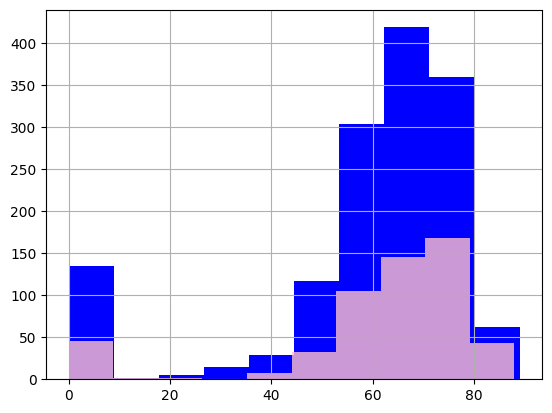

In [16]:
train_df['explicit'] = train_df.explicit.astype(bool)
train_df['explicit'] = train_df.explicit.astype(int)
train_df[train_df['explicit'] == 0]['popularity'].hist(color="blue", label='not explicit')
train_df[train_df['explicit'] == 1]['popularity'].hist(color="pink", label='explicit',alpha=0.8)

print()

**3)Construction of a line graph about changes of speechiness, acoustiness and instrumentalness between 1999 and 2019**

We get that instrumentalness was slightly changed, but not significantly. Levels of speechiness are acoustiness
have almost the same dynamic of changes, they have a lot of changes during the whole period

      speechiness  acousticness  instrumentalness
1998     0.291000      0.339000          0.000000
1999     0.067224      0.143688          0.009172
2000     0.077557      0.118339          0.030429
2001     0.107445      0.145060          0.021340
2002     0.124220      0.144033          0.010083
2003     0.117113      0.183556          0.038006
2004     0.125802      0.113342          0.015842
2005     0.127886      0.122955          0.018278
2006     0.116444      0.119027          0.001916
2007     0.109497      0.116893          0.012669
2008     0.087460      0.074256          0.024706
2009     0.088143      0.116025          0.027654
2010     0.098915      0.099769          0.009651
2011     0.091556      0.111824          0.017302
2012     0.078770      0.085869          0.014997
2013     0.086762      0.100059          0.009205
2014     0.072702      0.118018          0.010313
2015     0.086106      0.134349          0.023110
2016     0.105472      0.150606          0.011187


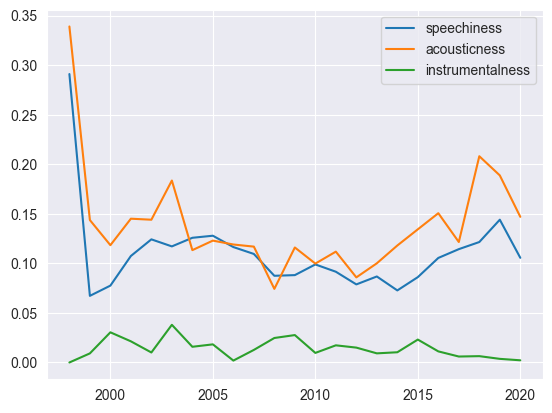

In [32]:
sorted_year = pd.unique(train_df['year'])
sorted_year.sort()

df = pd.DataFrame({
    'speechiness': train_df.groupby(['year'])['speechiness'].mean(),
    'acousticness': train_df.groupby(['year'])['acousticness'].mean(),
    'instrumentalness': train_df.groupby(['year'])['instrumentalness'].mean()
    }, index=sorted_year)


print(df)
lines = df.plot.line()

**4)Finding out how special factors of songs changed in 5 most popular genres**


It is worth mentioning that almost all data is almost similiar about different genres, as colourful dots are groupped in one point
As we can see, our dots are very mixed, so we cannot highlight features of exact one genre about its' peculiarity


Besides, I can say that looking at the danceability&speechiness, values of danceability are considerably different, while values of speechiness are not so different from each other(most of them are grouped in such way: 0<speechiness<0.3). 
Similiar thoughts appear looking at the loudness&speechiness. There almost all points are groped in such way: -8<loudness<-3, while value of speechiness is more variable. 

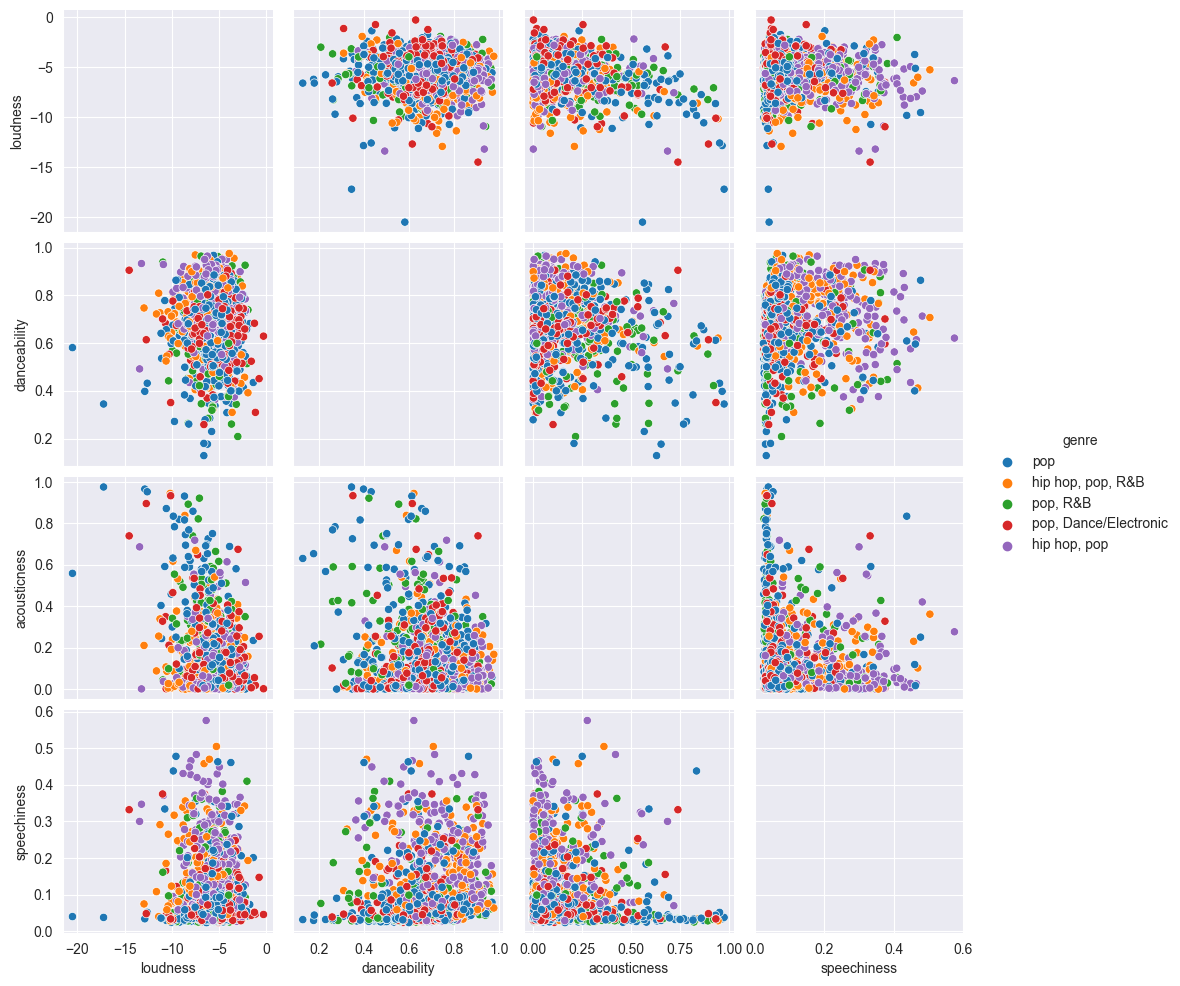

In [33]:
top_genre_list = []
for i in top_genre_df.index:
    top_genre_list.append(i)

train_df_copy = train_df[['loudness','danceability','acousticness','speechiness', 'genre']]
train_df_copy = train_df_copy[train_df_copy['genre'].isin(top_genre_list)]

sns.pairplot(data=train_df_copy, hue = 'genre', diag_kind="year")

**5)Construction of a jointplot of connection energy with danceability**

We can notice that most of popular songs are energy, while high danceability can be noticed not everywhere. Popular songs are both danceable and indanceable. But we also can notice that than more danceable is sing, than it is more energy

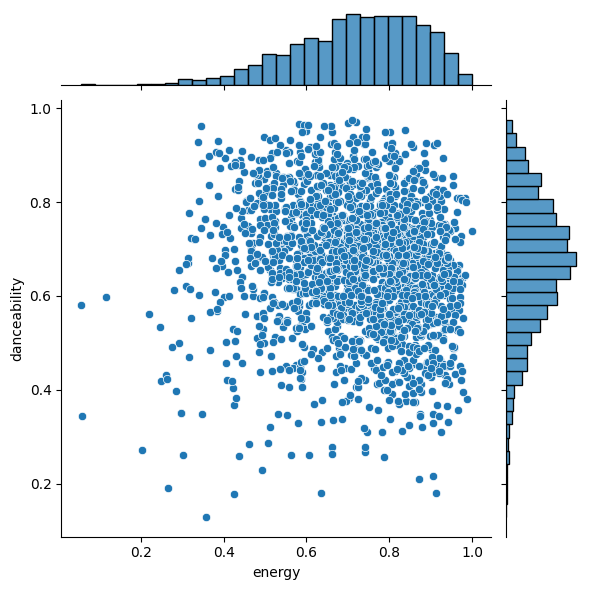

In [19]:
sns.jointplot(data=train_df, x="energy", y="danceability")

**6)Construction of a pie chart about proportions of keys of all songs**

the most popular key: C# 

the least popular key: D# 

Explanation of these 'crazy' quantifiers: if someone is deeply intersted in music, he exactly knows about keys in music. They are used to categorized each note, for example, C# is a musical note lying a chromatic semitone above C and a diatonic semitone below D; it is the second semitone of the solfège.

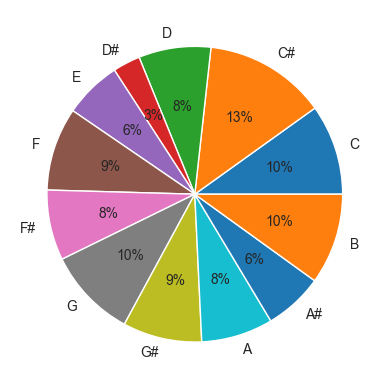

In [34]:
train_df = pd.read_csv("spotify_project.csv")
key_list = train_df.groupby('key').size()
#С Легендой
#train_df = pd.DataFrame({'key': key_list.tolist()},
#    index = ['0','1','2','3','4','5','6','7','8','9','10','11'])
#train_df.plot.pie(y='key', autopct='%1.0f%%')


index = ['С','С#','D','D#','E','F','F#','G','G#','A','A#','B']
plt.pie(key_list.tolist(), labels=index, autopct='%1.0f%%')
plt.show()

# Check hypothesis

We can notice an unpredictable increase in number of as called happy songs(valence > 0.5) in early 2000s.
Also, there is a significant fall from 2012 to 2013, we can suppose that this is due to predicted end of the world people had bad and depressing mood, so they were tend to listen to such called unhappy songs(valence<0.5).



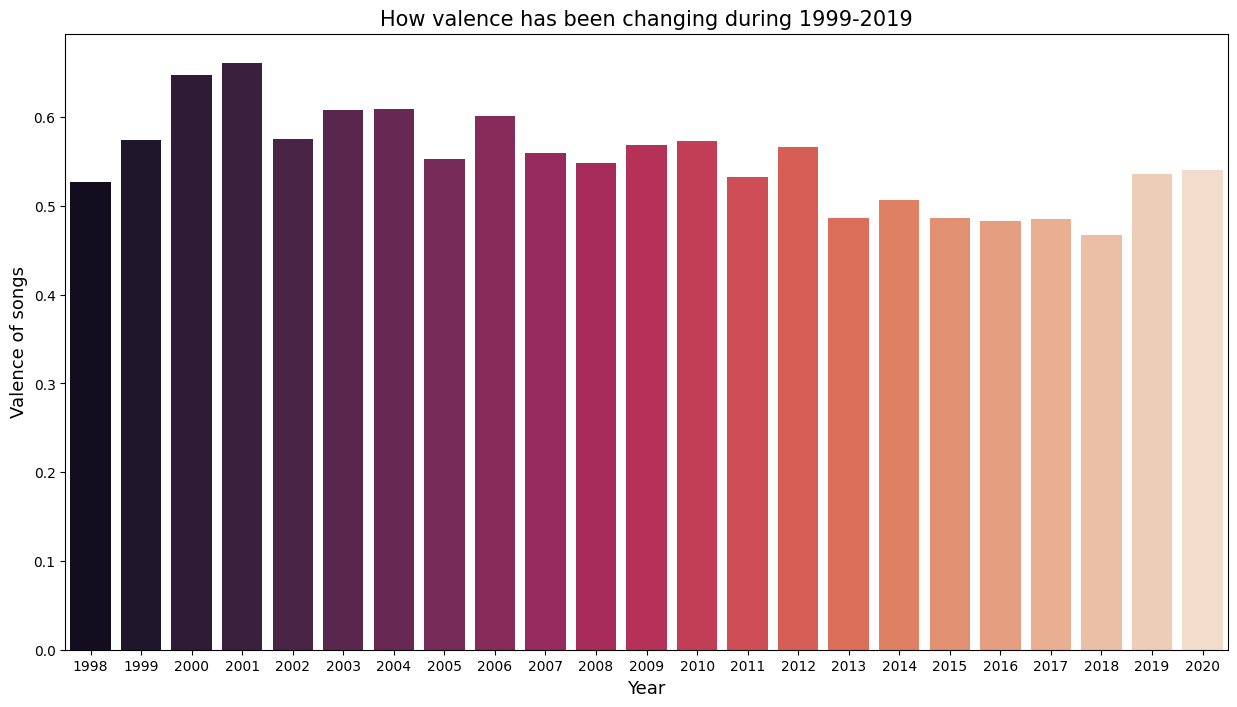

In [21]:
plt.figure(figsize = (15,8))
plots = sns.barplot(x = 'year', y = 'valence', data = train_df, ci=None, palette = 'rocket')  

plt.xlabel('Year', size = 13)
plt.ylabel('Valence of songs', size = 13)

plt.title('How valence has been changing during 1999-2019', size = 15)

plt.show()

**Speaking about popularity of songs, in 2008 and in 2014 unhappy songs became more popular than happy, I think, this was caused by world crises.**

**In 2019 popularity of both types jumped.I can guess that it id because of overall increase in number of released songs. Due to Coronovirus singers understood that people need to have entertainment, so they started to release more songs than usually, at least I think so**

**Over the whole period valence had been reducing**

      popularity_happy  popularity_unhappy  valence_mean
1998         49.000000                 NaN     52.700000
1999         66.480000           61.923077     57.400789
2000         59.049180           56.230769     64.797297
2001         58.929412           61.909091     66.104074
2002         61.344828           64.312500     57.515556
2003         60.117647           55.689655     60.763196
2004         57.761194           59.965517     60.888125
2005         62.333333           60.878049     55.307692
2006         59.461538           52.900000     60.127368
2007         61.381818           57.871795     55.949894
2008         63.211538           64.311111     54.868557
2009         59.530612           64.342857     56.893095
2010         59.785714           62.567568     57.291028
2011         60.109091           56.636364     53.225859
2012         61.314286           59.377778     56.612435
2013         53.523810           55.914894     48.682809
2014         56.480000         

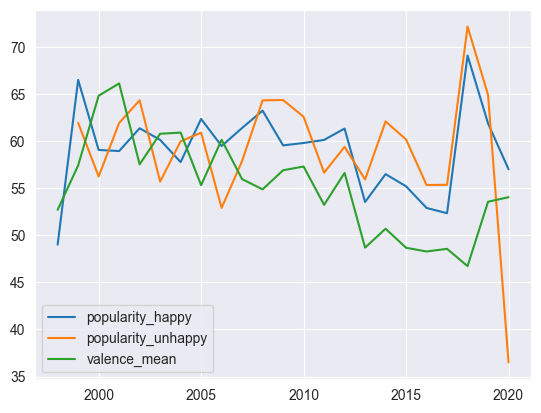

In [35]:
sorted_year = pd.unique(train_df['year'])
sorted_year.sort()


df = pd.DataFrame({
    'popularity_happy': train_df[train_df['valence'] > 0.5].groupby(['year'])['popularity'].mean(),
    'popularity_unhappy': train_df[train_df['valence'] < 0.5].groupby(['year'])['popularity'].mean(),
    'valence_mean': train_df.groupby(['year'])['valence'].mean() * 100
    }, index=sorted_year)


print(df)
lines = df.plot.line()

# Summary of hypothesis

In conclusion I've learned that mean level of valence of songs over a year is not dependent on global problems, but popularity of either happy or unhappy songs is probably dependent on global events

So, my hypothesis about the valence was incorrect, while hypothesis about connection between popularity and people's mood is quite proved.

# Some more exciting facts to learn more about my data set

I think it's very interesting to get information about the most popular singers of 2 decades from 1999 to 2019. 
We can see TOP-5 singers.




In [36]:
top_singers_df = train_df['artist'].value_counts().head(5)
print(top_singers_df)

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
Name: artist, dtype: int64


**To make it more appealing I decided to add an amazing vizualization of popular singers, which is in my new column 'occurence'**


In [37]:
px.bar(train_df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(20),
       x='artist',y='song',labels={'song':'Total occurences'},color_discrete_sequence=['pink'],
       text='song',
       title='List of number of Songs of 20 most popular artists')

 **I suggest to look about dynamic of googling their names(we will use data from google trends)**

We obtain that Rihanna is the most popular singer as she was in TOP more than other people, so we can make a conclusion that she is the most popular singer. And also we get other 4 singers, whose songs were most listened to during the period 1999-2019

Let's check how often their names were googled?
it is also worth mentioning that the values range from 0 to 100. It is about 'how google trends work?'


<AxesSubplot: xlabel='date'>

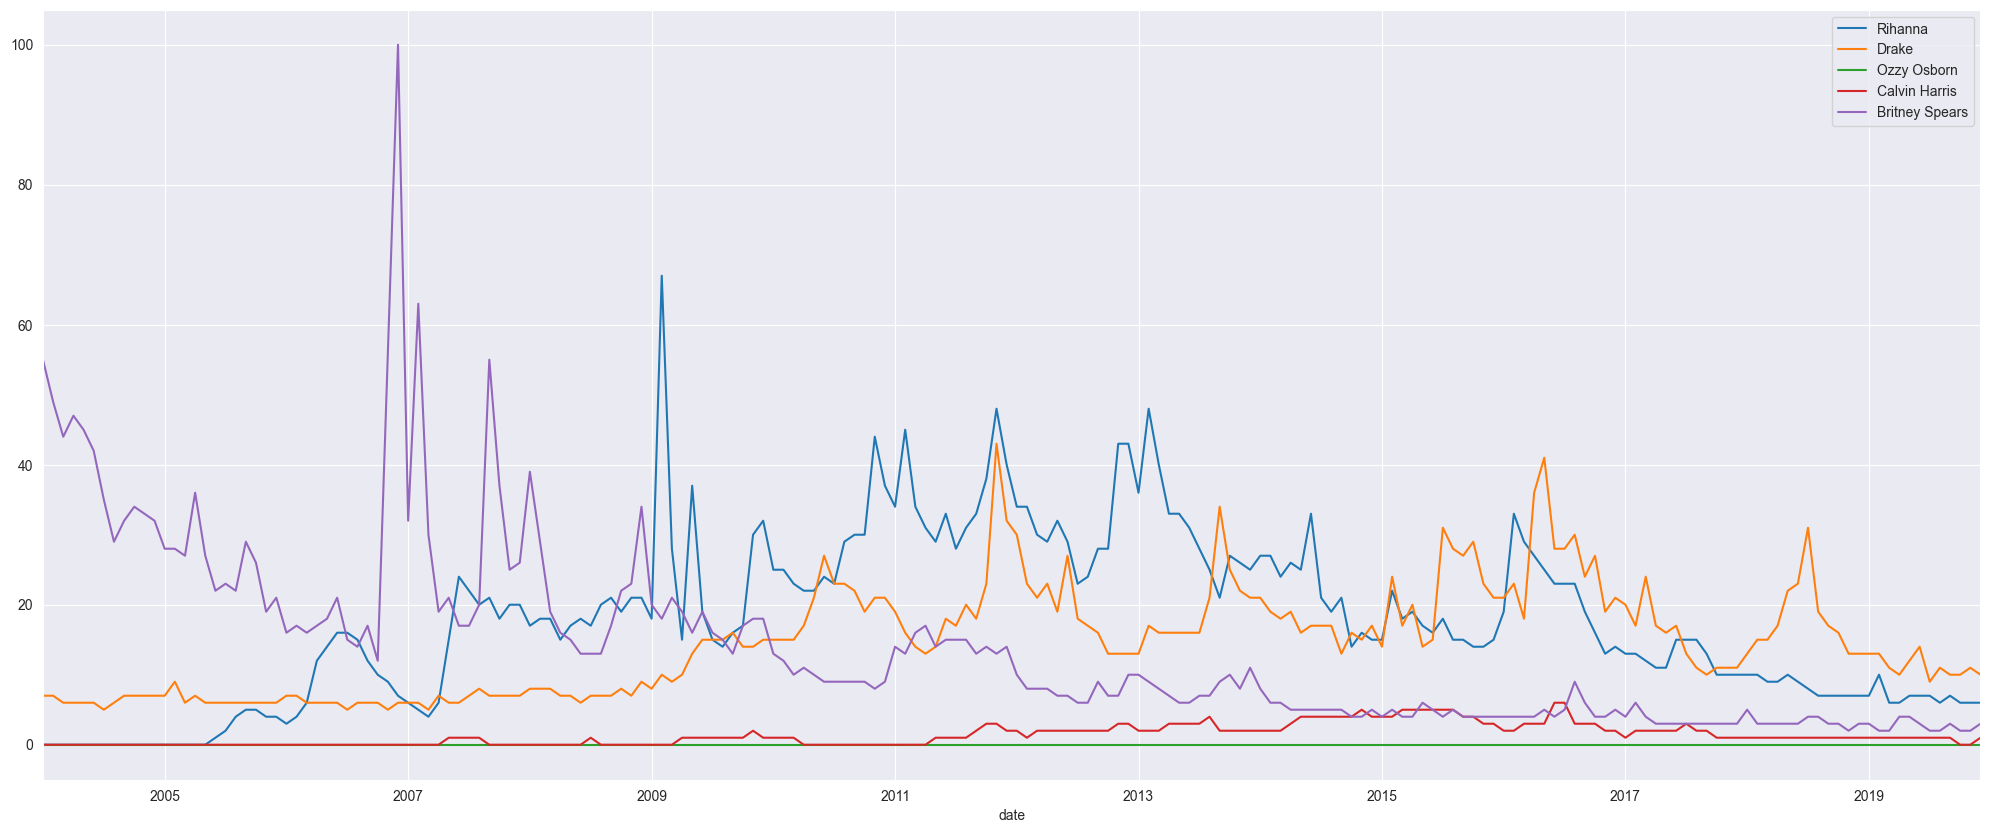

In [49]:
from pytrends.request import TrendReq
import seaborn 
import time


seaborn.set_style('darkgrid')
pt = TrendReq(hl="en-US", tz=360)


pt.build_payload(["Rihanna","Drake","Eminem","Calvin Harris","Britney Spears"], timeframe="1999-01-01 2019-12-31")
graphic = pt.interest_over_time()
graphic.plot(figsize = (25, 10))

**Exciting!**

It is really interesting that Britney Spears was googled more than other people, but she is not the most popular singer if we look at statistics from my data set

Let's look on the bars of popularity on years in Rihanna (as she is the most popular singer) and in Britney Spears(as she is the most googled singer)


In [44]:
rihanna_peak = train_df[train_df['artist'] == 'Rihanna']

fig = px.bar(rihanna_peak, x='year', y='popularity',title = "Peaks of Rihanna's popularity")
fig.show()

In [45]:
rihanna_peak = train_df[train_df['artist'] == 'Britney Spears']

fig = px.bar(rihanna_peak, x='year', y='popularity',color_discrete_sequence=['green'],
             title = "Peaks of Britney's popularity")
fig.show()

**To sum up:**

**these exciting facts said that if someone is the most popular singer, it doesn't mean that this person will the most googled** 